<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-assignment-8/blob/main/a_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [5]:
# K-means clustering implementation
def k_means_clustering(data, k, max_iterations=100):
    np.random.seed(42)  # For reproducibility
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iterations):
        # Assign clusters
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([data[closest_cluster == k].mean(axis=0) for k in range(centroids.shape[0])])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, closest_cluster

In [8]:
dataset_file_path = '/content/drive/MyDrive/dm-assignment-6/iris.data.csv'

In [11]:
# Load the dataset
file_path = dataset_file_path  # Update the file path
data = pd.read_csv(file_path)
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
# relevant features
features = data[['Iris-setosa','0.2']]
features.fillna(0, inplace=True)  # Handling missing values

<ipython-input-14-5c53fcc96c7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(0, inplace=True)  # Handling missing values


In [19]:
# Preprocess the data (assuming the last column is the label)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


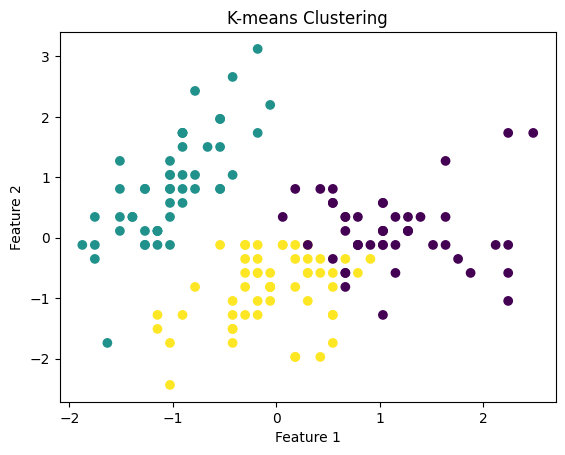

In [22]:
# Visualize the results (this is an example and will vary based on your dataset's features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()